In [1]:
import os, sys
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import *
from tensorflow.train import Checkpoint
from tensorflow import GradientTape
from PIL import Image
import random
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras import Model
from IPython.display import clear_output

In [2]:
os.getcwd()

'c:\\Users\\Mónica Emmanuelle\\Documents\\Code\\GAN Builder\\resources'

In [2]:
current_folder = os.path.dirname(os.getcwd()) #This line of code change in jupyter notebooks!!!
models_folder = os.path.join(current_folder, "Models")

project = "test"
#title = "PAINTER"
#image = os.path.join(project, "image.jpg")
#color = (55, 69, 72)
#architecture = 1
project_path = os.path.join(models_folder, project)
train_path = os.path.join(project_path, "train")
target_path = os.path.join(project_path, "target")
output_path = os.path.join(project_path, "output")
checkpoints_path = os.path.join(project_path, "checkpoints")
model_path = os.path.join(project_path, "model")
image_size = 256
user_input_path = os.path.join(model_path, "input")
user_output_path = os.path.join(model_path, "output")
if not os.path.exists(user_input_path):
    os.mkdir(user_input_path)
if not os.path.exists(user_output_path):
    os.mkdir(user_output_path)

In [3]:
files = os.listdir(train_path)
user_files = os.listdir(user_input_path)
len(files), len(user_files)

(60, 10)

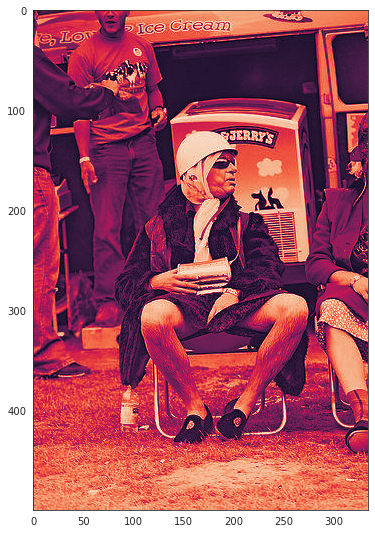

In [4]:
my_file = os.path.join(train_path, files[0])
image = Image.open(my_file)
with sns.axes_style("white"):
    g = plt.subplots(figsize=(6, 12))
    g = plt.imshow(image)

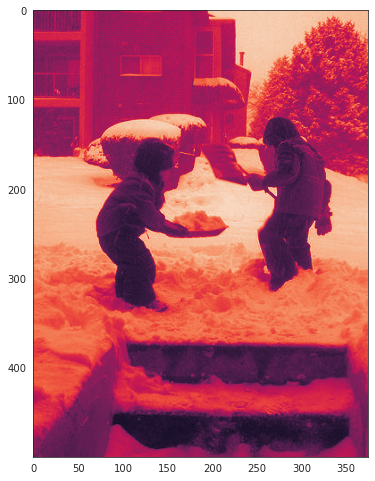

In [5]:
my_file = os.path.join(user_input_path, user_files[0])
image = Image.open(my_file)
with sns.axes_style("white"):
    g = plt.subplots(figsize=(6, 12))
    g = plt.imshow(image)

In [6]:
# Preprocess the images
BATCH_SIZE = 1

#Recives the path of the image
def preprocess_image(file, size):
    # Load the image
    image = Image.open(file)
    #Resize the image
    image = image.resize((size, size))
    # Normalize it
    image = image.convert("RGB")
    image = (np.asarray(image)/127.5) -1
    return image


#Recives the image as a numpy array
def random_jitter(x_image, y_image, size):
    #Flip the image
    if random.choice([True, False]):
        x_image = x_image.flip()
        y_image = y_image.flip()

    #Crop the image
    def set_range(size):
        start = random.randint(0, size/2)
        end = end = random.randint(size/2, size)
        return start, end
    if random.choice([True, False]):
        h_range = set_range(size)
        v_range = set_range(size)
        x_image = x_image[h_range[0]:h_range[1], v_range[0]:v_range[1]]
        y_image = y_image[h_range[0]:h_range[1], v_range[0]:v_range[1]]

    return x_image, y_image

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


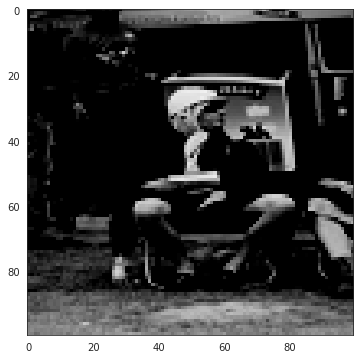

In [7]:
ini_image_path = os.path.join(train_path, files[0])
ini_image = preprocess_image(ini_image_path, 100)
ini_image.shape
with sns.axes_style("white"):
    plt.figure(figsize=(6, 6))
    plt.imshow(ini_image)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


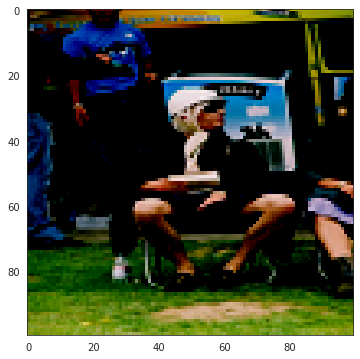

In [8]:
ini_image_path = os.path.join(target_path, files[0])
ini_image = preprocess_image(ini_image_path, 100)
ini_image.shape
with sns.axes_style("white"):
    plt.figure(figsize=(6, 6))
    plt.imshow(ini_image)

In [9]:
def build_datasets(test_size = 0):
    x, y = [], []
    for i in range(len(files)):
        x_image = preprocess_image(os.path.join(train_path, files[i]), image_size)
        x.append(x_image)

    for i in range(len(files)):
        y_image = preprocess_image(os.path.join(target_path, files[i]), image_size)
        y.append(y_image)
        
    if test_size == 0:
        x_train = np.array(x)
        y_train = np.array(y)
        train = tf.data.Dataset.from_tensor_slices((x_train, y_train)).batch(BATCH_SIZE)
        test = train
    else:
        x_train, x_test, y_train, y_test = train_test_split(np.array(x), np.array(y), test_size= test_size)
        train = tf.data.Dataset.from_tensor_slices((x_train, y_train)).batch(BATCH_SIZE)
        test = tf.data.Dataset.from_tensor_slices((x_test, y_test)).batch(BATCH_SIZE)

    return train, test

In [10]:
train_dataset, test_dataset = build_datasets()
print(len(train_dataset))
for input_image, target in train_dataset:
    print(input_image.shape)
    print(target.shape)

60
(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 25

In [11]:
# MODEL
def down_block(filters, batchnorm = False):
    model = keras.Sequential()
    initializer = tf.random_normal_initializer(0, 0.02)
    model.add(Conv2D(filters, kernel_size=4, strides=2, padding="same", kernel_initializer=initializer, use_bias = not batchnorm))
    if batchnorm:
        model.add(BatchNormalization())
    model.add(LeakyReLU())
    return model


def up_block(filters, dropout = False):
    model = keras.Sequential()
    initializer = tf.random_normal_initializer(0, 0.02)
    model.add(Conv2DTranspose(filters, kernel_size=4, strides=2, padding="same", kernel_initializer=initializer, use_bias = False))
    if dropout:
        model.add(Dropout(0.5))
    model.add(ReLU())
    return model

In [12]:
class Generator():
    def __init__(self):
        self.input = Input(shape=[None, None, 3])
        self.down_stack = [
            down_block(64),                     #batch_size, 128, 128, 64  
            down_block(128, batchnorm = True),  #batch_size, 64, 64, 128
            down_block(256, batchnorm = True),  #batch_size, 32, 32, 256
            down_block(512, batchnorm = True),  #batch_size, 16, 16, 512
            down_block(512, batchnorm = True),  #batch_size, 8, 8, 512
            down_block(512, batchnorm = True),  #batch_size, 4, 4, 512
            down_block(512, batchnorm = True),  #batch_size, 2, 2, 512
            down_block(512, batchnorm = True)   #batch_size, 1, 1, 512
        ]
        self.up_stack = [
            up_block(512, dropout = True),      #batch_size, 2, 2, 1024
            up_block(512, dropout = True),      #batch_size, 4, 4, 1024
            up_block(512, dropout = True),      #batch_size, 8, 8, 1024
            up_block(512),                      #batch_size, 16, 16, 1024
            up_block(256),                      #batch_size, 32, 32, 512
            up_block(128),                      #batch_size, 64, 64, 512
            up_block(64)                        #batch_size, 128, 128, 128
        ]
        initializer = tf.random_normal_initializer(0, 0.2)
        self.to_output = Conv2DTranspose(filters = 3, kernel_size=4, strides=2, padding="same", kernel_initializer=initializer, activation="tanh")
        self.make_connections()

    def make_connections(self):
        block = self.input
        skip_connections = []
        for stack in self.down_stack:
            block = stack(block)
            skip_connections.append(block)
        skip_connections = reversed(skip_connections[:-1])
        concat = Concatenate()
        for stack, skip in zip(self.up_stack, skip_connections):
            block = stack(block)
            block = concat([block, skip])
        self.output = self.to_output(block)
        self.model = Model(inputs = self.input, outputs = self.output)

    def loss(self, discount, generated, target):
        LAMBDA = 100
        loss_object = keras.losses.BinaryCrossentropy(from_logits = True)
        gan_loss = loss_object(tf.ones_like(discount), discount)
        l1_loss = tf.reduce_mean(tf.abs(target - generated))
        total_loss = gan_loss + (LAMBDA * l1_loss)
        return total_loss

    def get_model(self):
        return self.model

    def get_optimizer(self):
        self.optimizer = keras.optimizers.Adam(2e-4, beta= 0.5)
        return self.optimizer

generator = Generator()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


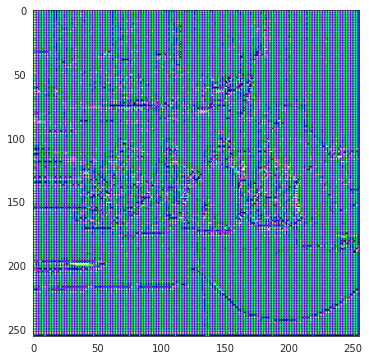

In [14]:
for input_image, target in train_dataset:
    gen_output = generator.get_model()((input_image+1)*255, training=False)
with sns.axes_style("white"):
    plt.figure(figsize=(6, 6))
    plt.imshow(gen_output[0, ...])

In [16]:
class Discriminator():
    def __init__(self):
        self.target = Input(shape=[None, None, 3])
        self.generated = Input(shape=[None, None, 3])
        self.input = concatenate([self.target, self.generated])
        initializer = tf.random_normal_initializer(0, 0.02)
        self.stack = [
            down_block(64),
            down_block(128, batchnorm = True),
            down_block(256, batchnorm = True),
            down_block(512, batchnorm= True),
        ]
        self.to_output = Conv2D(filters = 1, kernel_size = 4, strides = 1, kernel_initializer=initializer, padding = "same")
        self.make_connections()

    def make_connections(self):
        block = self.input
        for stack in self.stack:
            block = stack(block)
        self.output = self.to_output(block)
        self.model = Model(inputs = [self.target, self.generated], outputs = self.output)

    def loss(self, target, generated):
        loss_object = keras.losses.BinaryCrossentropy(from_logits = True)
        target_loss = loss_object(tf.ones_like(target), target)
        generated_loss = loss_object(tf.zeros_like(generated), generated)
        discount_loss = target_loss + generated_loss
        return discount_loss

    def get_model(self):
        return self.model

    def get_optimizer(self):
        self.optimizer = keras.optimizers.Adam(2e-4, beta= 0.5)
        return self.optimizer

discriminator = Discriminator()

TensorShape([1, 16, 16, 1])

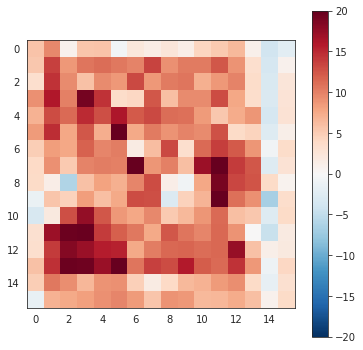

In [17]:
for input_image, target in train_dataset:
    disc_out = discriminator.get_model()([(input_image+1)*255, gen_output], training=False)
with sns.axes_style("white"):
    plt.figure(figsize=(6, 6))
    plt.imshow(disc_out[0, ..., -1], vmin=-20, vmax=20, cmap='RdBu_r')
    plt.colorbar()
disc_out.shape

In [18]:
def train_step(input_image, target):
    with GradientTape() as generator_tape, GradientTape() as discriminator_tape:
        generator_image = generator.model(input_image, training = True)
        discriminator_generated = discriminator.model([generator_image, input_image], training = True)
        discriminator_target = discriminator.model([target, input_image], training = True)
        discriminator_loss = discriminator.loss(discriminator_target, discriminator_generated)
        generator_loss = generator.loss(discriminator_generated, generator_image, target)

        generator_gradients = generator_tape.gradient(generator_loss, generator.model.trainable_variables)
        discriminator_gradients = discriminator_tape.gradient(discriminator_loss, discriminator.model.trainable_variables)
        generator.get_optimizer().apply_gradients(zip(generator_gradients, generator.model.trainable_variables))
        discriminator.get_optimizer().apply_gradients(zip(discriminator_gradients, discriminator.model.trainable_variables))

In [19]:
def make_checkpoints():
    global checkpoint
    checkpoint = Checkpoint(generator_optimizer = generator.get_optimizer(),
                            discriminator_optimizer = discriminator.get_optimizer(),
                            generator = generator.get_model(),
                            discriminator = discriminator.get_model())

def restore_checkpoint():
    last_checkpoint = tf.train.lastest_checkpoint(checkpoints_path)
    checkpoint.restore(last_checkpoint).assert_consumed()

In [20]:
def generate_images(model, test, target, save_filename = False, display_images= False):
    prediction = model(test, training = True)
    if save_filename:
        tf.keras.preprocessing.image.save_img(output_path + "/" + save_filename + ".jpg", prediction[0, ...])
    plt.figure(figsize=(10, 10))
    display_list = [test[0], target[0], prediction[0]]
    title = ["Input Image", "Ground Truth", "Predicted Image"]
    
    if display_images:
        for i in range(3):
            plt.subplot(1, 3, i+1)
            plt.title(title[i])
            plt.imshow(display_list[i] * 0.5 + 0.5)
            plt.axis("off")
    
    plt.show()

In [21]:
def train(dataset, epochs, display = False):
    for epoch in range(epochs):
        for input_image, target in dataset:
            train_step(input_image, target)
        if (epoch + 1) % 25 == 0:
            make_checkpoints()

In [22]:
train(train_dataset, 3, display=True)

InvalidArgumentError: cannot compute Sub as input #1(zero-based) was expected to be a double tensor but is a float tensor [Op:Sub]